In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Required by Jupyter for inlining images
%matplotlib inline

In [2]:
SPSIntensity = pd.read_csv('../Data/SPS_intensity_B1.txt',sep=' ', header=None)
SPSIntensity.columns = ['Time Stamp','Reading']
#SPS Intensity is the Intensity right before Extraction
#Intensity - Number of bunches
#Measured in /cm(s)

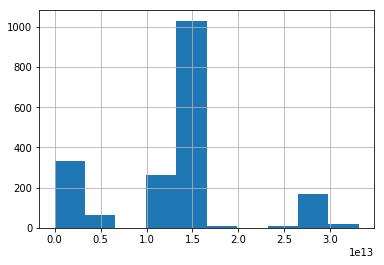

In [3]:
SPSIntensity['Reading'].hist()

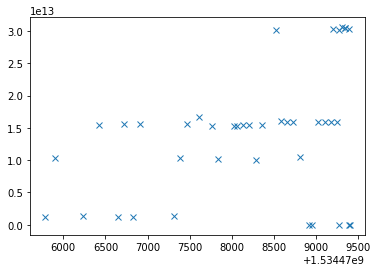

In [4]:
plt.plot(SPSIntensity['Time Stamp'][:40],SPSIntensity['Reading'][:40],'x')

In [3]:
LHCdata = pd.read_csv('../Data/LHC_intensity_B1.txt',sep=' ', header=None)
LHCdata.columns = ['Time Stamp','Reading']

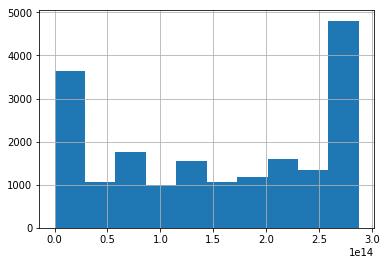

In [6]:
LHCdata['Reading'].hist()

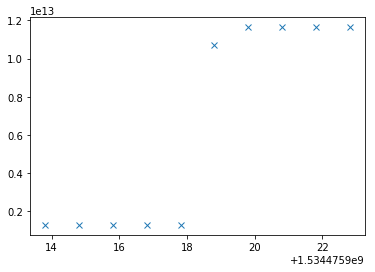

In [4]:
plt.plot(LHCdata['Time Stamp'][10:20],LHCdata['Reading'][10:20],'x')
#This is the cumulative intensity
#As we can see, the readings are taken 10s around
#each injection.

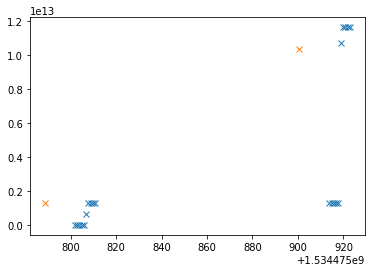

In [8]:
plt.figure()
plt.plot(LHCdata['Time Stamp'][:20],LHCdata['Reading'][:20],'x')
plt.plot(SPSIntensity['Time Stamp'][:2],SPSIntensity['Reading'][:2],'x')
#Also the SPS Intensity injection is happening right before the jump
#in the LHC cumulative intensity readings

In [4]:
#This function calculates the spike jump for each SPS injection into the LHC
def calculateSpikeJump(LHCdata):
    differences = []
    times = []
    cntr = 0
    while cntr<len(LHCdata['Reading']):
        #print(cntr)
        dataSlice = LHCdata[cntr:cntr+10]
        differences.append(max(dataSlice['Reading'])-min(dataSlice['Reading']))
        times.append(dataSlice['Time Stamp'][cntr+5])
        cntr = cntr+10
    data = {'Time Stamp':times,'Reading':differences}
    return pd.DataFrame(data=data)

In [5]:
LHCDifferences = calculateSpikeJump(LHCdata)

In [7]:
print(LHCDifferences.describe(),SPSIntensity.describe())

         Time Stamp       Reading
count  1.898000e+03  1.898000e+03
mean   1.537150e+09  1.819257e+13
std    1.675604e+06  4.579043e+13
min    1.534476e+09  1.474855e+10
25%    1.535796e+09  4.622767e+11
50%    1.536506e+09  1.557033e+13
75%    1.538614e+09  1.598824e+13
max    1.540021e+09  2.844247e+14          Time Stamp       Reading
count  1.890000e+03  1.890000e+03
mean   1.537151e+09  1.339114e+13
std    1.676257e+06  7.734543e+12
min    1.534476e+09 -1.886400e+10
25%    1.535796e+09  1.054616e+13
50%    1.536506e+09  1.582454e+13
75%    1.538614e+09  1.610514e+13
max    1.540021e+09  3.312519e+13


In [11]:
#We need a smart way to merge the 2 datasets
#since SPS has 8 missing readings somewher
np.histogram((SPSIntensity['Time Stamp'][0:200] -LHCDifferences['Time Stamp'][0:200]).values)

(array([  7, 139,   4,   7,   6,   7,   7,   7,   9,   7]),
 array([-20.21100044, -18.4915004 , -16.77200036, -15.05250032,
        -13.33300028, -11.61350024,  -9.8940002 ,  -8.17450016,
         -6.45500011,  -4.73550007,  -3.01600003]))

In [26]:
##BE CAREFUL WHEN RE RUNNING, I ACCIDENTLY DELETED ONE OF THE ROWS TO DROP
##SO CHECK DATA BEFORE DROPPING!!

#remove bad rows
LHCDifferences = LHCDifferences.drop(276)
LHCDifferences.index = range(len(LHCDifferences))

In [31]:
LHCDifferences = LHCDifferences.drop(331)
LHCDifferences.index = range(len(LHCDifferences))

In [37]:
LHCDifferences = LHCDifferences.drop(614)
LHCDifferences.index = range(len(LHCDifferences))

In [42]:
LHCDifferences = LHCDifferences.drop(981)
LHCDifferences.index = range(len(LHCDifferences))

In [50]:
LHCDifferences = LHCDifferences.drop(1244)
LHCDifferences.index = range(len(LHCDifferences))

In [56]:
LHCDifferences = LHCDifferences.drop(1505)
LHCDifferences.index = range(len(LHCDifferences))

In [58]:
LHCDifferences = LHCDifferences.drop(1584)
LHCDifferences.index = range(len(LHCDifferences))

In [63]:
len(LHCDifferences)-len(SPSIntensity)
#Perfect, they now match

0

In [16]:
data = pd.DataFrame({'LHC':LHCDifferences['Reading'],'SPS':SPSIntensity['Reading']})


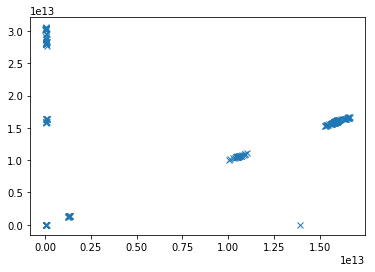

In [13]:
plt.plot(data['LHC'],data['SPS'],'x')
#Expected Correlation here

In [12]:
#Just take the first 200 readings of the original dataset for now
#This is done instead of editing the dataset(as can be seen done above)
data = pd.DataFrame({'LHC':LHCDifferences['Reading'][:200],'SPS':SPSIntensity['Reading'][:200]})

/home/marc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


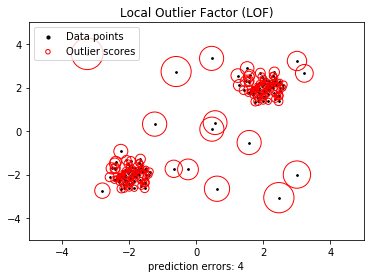

In [21]:
from sklearn.neighbors import LocalOutlierFactor

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
#plt.plot(X_inliers,'x')

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
#plt.plot(X,'x')

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1
#plt.plot(ground_truth,'x')

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()